In [1]:
!pip3 install -r requirements.txt --quiet

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (22,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
URL = 'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/refs/heads/main/house-prices/train.csv'
df = pd.read_csv(URL)
df.drop(columns='Id', inplace=True)
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
804,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
710,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,270,270,GasA,Gd,Y,SBrkr,729,0,0,729,0,0,1,0,2,1,TA,5,Maj2,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
353,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,8,1928,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,624,624,GasA,Gd,Y,SBrkr,720,0,0,720,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,2005.0,Unf,2,484,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,105900
382,60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,939,939,GasA,Ex,Y,SBrkr,939,858,0,1797,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2006.0,RFn,2,639,TA,TA,Y,144,53,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,213500
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,113000


In [4]:
#Dropping Columns with more than 50% null values
null_df = pd.DataFrame(df.isnull().sum()/len(df)*100)\
        .reset_index().rename(columns={'index':'Column', 0: 'Null_Pct'})\
        .sort_values(by='Null_Pct', ascending=False).query('Null_Pct!=0').reset_index(drop=True)
cols_to_drop = null_df.query('Null_Pct>50')['Column'].values.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [5]:
# Identify columns with missing values
cols_to_fill = (df.isnull().sum() / len(df) * 100)\
    .reset_index().rename(columns={'index': 'Column', 0: 'Null_Pct'})\
    .sort_values(by='Null_Pct', ascending=False).query('Null_Pct != 0')\
    .reset_index(drop=True)['Column'].values.tolist()

# Iterate and fill missing values based on column data type
for col in cols_to_fill:
    if df[col].dtype == 'object':  # For categorical columns
        mode = df[col].mode().values[0]  # Get mode
        df[col].fillna(mode, inplace=True)
    elif df[col].dtype in ['float64', 'int64']:  # For numerical columns
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr =  q3 - q1
        lower_bound, upper_bound = q1 - (1.5 * iqr), q3 + (1.5 * iqr)
        mean = round(df[col][(df[col] > lower_bound) & (df[col] < upper_bound)].mean())
        df[col].fillna(mean, inplace=True)

In [6]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
460,60,FV,75.0,8004,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,2Story,8,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,110.0,Gd,TA,PConc,Gd,TA,No,GLQ,544,Unf,0,288,832,GasA,Ex,Y,SBrkr,832,1103,0,1935,1,0,2,1,3,1,TA,8,Typ,0,Gd,BuiltIn,2009.0,Fin,2,552,TA,TA,Y,0,150,0,0,0,0,0,12,2009,New,Partial,263435
780,20,RL,63.0,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,38.0,TA,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1253,0,0,1253,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1995.0,Fin,2,402,TA,TA,Y,220,21,0,0,0,0,0,6,2007,WD,Normal,176000
411,190,RL,100.0,34650,Pave,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,CBlock,TA,TA,Mn,Rec,1056,Unf,0,0,1056,GasA,TA,N,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,5,Typ,0,Gd,Attchd,1955.0,Fin,2,572,TA,TA,Y,264,0,0,0,0,0,0,1,2006,WD,Normal,145000
1014,20,RL,60.0,11664,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,6,5,1948,1950,Gable,CompShg,MetalSd,MetalSd,206.0,TA,TA,CBlock,TA,Fa,No,BLQ,336,Unf,0,746,1082,GasA,TA,Y,SBrkr,1082,0,0,1082,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,130,0,0,0,0,0,11,2007,WD,Normal,119200
764,120,RL,30.0,9549,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,Gd,PConc,Gd,Gd,Av,LwQ,437,GLQ,1057,0,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,1,1,2,1,Ex,6,Typ,1,Gd,Attchd,1995.0,Fin,2,481,TA,TA,Y,0,30,0,0,216,0,0,4,2006,WD,Normal,270000


In [7]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
for col in cat_cols:
    uniques = sorted(df[col].unique().tolist())
    mapping = {val: idx for idx, val in enumerate(uniques)}  # Create a mapping dictionary
    df[col] = df[col].map(mapping)  # Replace values using the mapping

If the p-value is greater than 0.05, the result is typically considered not statistically significant.

In hypothesis testing:

- A p-value ≤ 0.05 suggests that there is enough evidence to reject the null hypothesis, implying the result is statistically significant.
- A p-value > 0.05 means there is not enough evidence to reject the null hypothesis, suggesting the result is not statistically significant.

So, for statistical significance, the p-value should be less than or equal to 0.05 (or another chosen significance level).

In [8]:
def correlation_test(df):
    from scipy import stats
    pearson_stat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
    pearson_p = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])
    spearman_stat = df.corr(method=lambda x, y: stats.spearmanr(x, y)[0])
    spearman_p = df.corr(method=lambda x, y: stats.spearmanr(x, y)[1])

    pearson_p = (pearson_p - np.eye(df.shape[1])).round(4)
    spearman_p = (spearman_p - np.eye(df.shape[1])).round(4)

    return pearson_stat, pearson_p, spearman_stat, spearman_p

corr = correlation_test(df)
corr_cols = list(corr[1][corr[1]['SalePrice'] <= 0.05]['SalePrice'].index)

In [9]:
df = df[corr_cols]

In [10]:
print(f"Columns after dropping unrelated columns : {df.shape[1]}")

Columns after dropping unrelated columns : 62


In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,4,5,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,3,3,2,706,150,856,1,0,1,4,856,854,1710,1,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,8,4,208500
1,20,3,80.0,9600,3,2,24,1,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,3,1,0,978,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,8,4,181500
2,60,3,68.0,11250,0,4,5,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,3,2,2,486,434,920,1,0,1,4,920,866,1786,1,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,8,4,223500
3,70,3,60.0,9550,0,0,6,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,3,1,3,0,216,540,756,1,2,1,4,961,756,1717,1,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,8,0,140000
4,60,3,84.0,14260,0,2,15,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,3,0,2,655,490,1145,1,0,1,4,1145,1053,2198,1,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,8,4,250000


${\displaystyle \mathbf {{\hat {\boldsymbol {\beta }}}=(X^{\top }X)^{-1}\space @ \space (X^{\top }Y)} \,}$

In [12]:
X = df.drop(columns='SalePrice').values
y = df['SalePrice'].values
X_T = X.transpose()
X_T_X = np.dot(X_T, X)
X_T_X_inv =  np.linalg.inv(X_T_X)
reshaped_y = y.reshape(-1,1)
X_T_y = np.dot(X_T, reshaped_y)
b = np.dot(X_T_X_inv, X_T_y)
y_pred = np.dot(X, b)

In [13]:
feature_names = df.drop(columns='SalePrice').columns
coefficients = b.flatten()

coefficients_df = pd.DataFrame({feature : coef for feature, coef in zip(feature_names, coefficients)}.items(), 
                                columns=['Column', 'Coeff'])
coefficients_df.set_index('Column', inplace=True)  # Set 'Column' as index

coefficients_df.applymap(lambda x: f'{x:.2e}')

,Coeff
Column,
MSSubClass,-1.27e+02
MSZoning,-1.69e+03
LotFrontage,-1.58e+02
LotArea,3.70e-01
LotShape,-9.16e+02
...,...
EnclosedPorch,-1.72e+00
ScreenPorch,4.17e+01
PoolArea,-1.60e+01


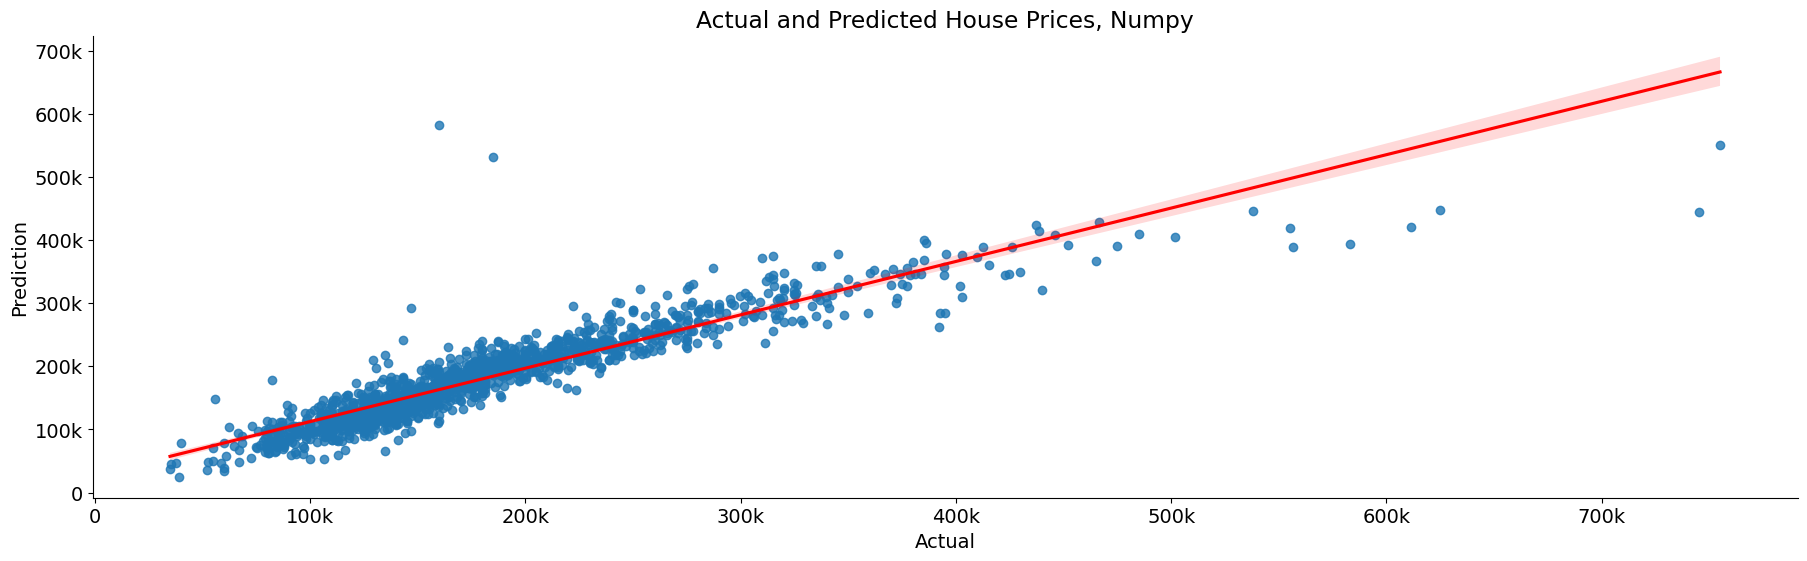

In [14]:
sns.regplot(x=y, y=y_pred, line_kws={'color': 'red'})
plt.title('Actual and Predicted House Prices, Numpy')
yticks = plt.gca().get_yticks()
# Create new labels by dividing and formatting as 'k'
ytick_labels = [str(int(i/1000)) + 'k' if i != 0 else '0' for i in yticks]
# Set the new y-tick labels
plt.gca().set_yticklabels(ytick_labels)  # Set the original tick positions

xticks = plt.gca().get_xticks()
# Create new labels by dividing and formatting as 'k'
xtick_labels = [str(int(i/1000)) + 'k' if i != 0 else '0' for i in xticks]
# Set the new y-tick labels
plt.gca().set_xticklabels(xtick_labels)  # Set the original tick positions
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [15]:
# Manually compute the mean and standard deviation for y and y_pred
def evaluate_model(y, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    y_mean = np.mean(y)
    y_std = np.std(y)

    y_pred_mean = np.mean(y_pred)
    y_pred_std = np.std(y_pred)

    # Normalize y and y_pred using the Z-score
    y_z = (y - y_mean) / y_std
    y_pred_z = (y_pred - y_pred_mean) / y_pred_std

    # Calculate the metrics on the normalized data
    mae = mean_absolute_error(y_z, y_pred_z)
    mse = mean_squared_error(y_z, y_pred_z)
    r2 = r2_score(y_z, y_pred_z)

    return {'MAE': float(mae), 'MSE': float(mse), 'R2': r2}


metric_df = pd.DataFrame(evaluate_model(y, y_pred).items(), columns=['Metric', 'Value'])
metric_df

,Metric,Value
0,MAE,0.252282
1,MSE,0.160704
2,R2,0.839296


Let's use scikit-learn to model this and see what is the kind of performance we can get.

In [16]:
from sklearn.linear_model import LinearRegression

# Load and clean the dataset
URL = 'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/refs/heads/main/house-prices/train.csv'
df = pd.read_csv(URL).drop(columns='Id')

# Dropping columns with more than 50% null values
cols_to_drop = df.isnull().mean().loc[lambda x: x > 0.5].index
df.drop(columns=cols_to_drop, inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Prepare features and target
X = df.drop(columns='SalePrice').values
y = df['SalePrice'].values

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mean = np.mean(y)
std = np.std(y)

# Normalize y and y_pred using Z-score
y_z = (y - mean) / std

preds_mean = np.mean(y_pred)
preds_std =  np.std(y_pred)
y_pred_z = (y_pred - preds_mean) / preds_std

metric_df = pd.DataFrame(evaluate_model(y_z, y_pred_z).items(), columns=['Metric', 'Value'])
metric_df

,Metric,Value
0,MAE,0.17605
1,MSE,0.07101
2,R2,0.92899


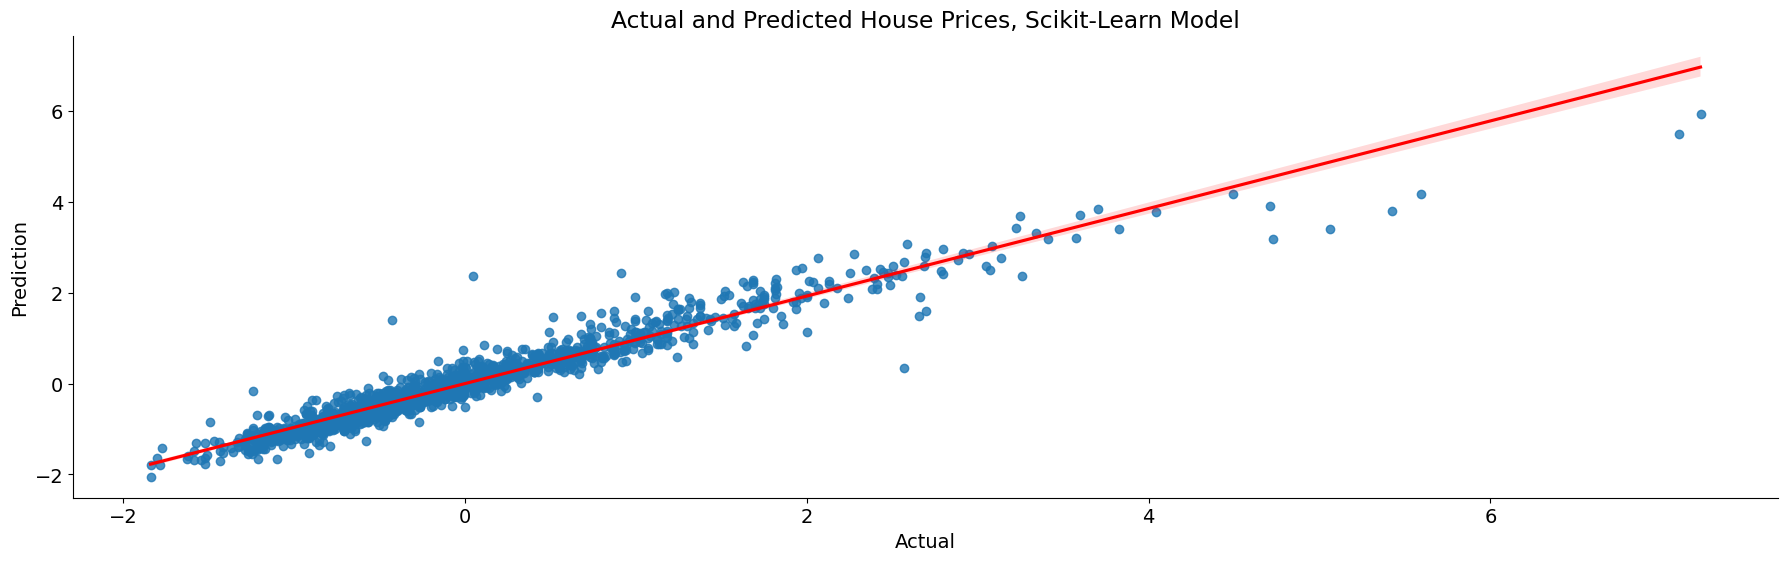

In [17]:
sns.regplot(x=y_z, y=y_pred_z, line_kws={'color': 'red'})
plt.title('Actual and Predicted House Prices, Scikit-Learn Model')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()